In [1]:
import pandas as pd
import matplotlib.pyplot as plt 


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import metrics

import joblib 
from tkinter import *

In [2]:
data = pd.read_csv('insurance.csv')

In [3]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
data['sex'] = data['sex'].map({'female':0,'male':1})

In [5]:
data['smoker'] = data['smoker'].map({'yes':1,'no':0})

In [6]:
data['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [7]:
data['region'] = data['region'].map({'southwest':1, 'southeast':2, 'northwest':3, 'northeast':4})

In [8]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,3,21984.47061
4,32,1,28.880,0,0,3,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,3,10600.54830
1334,18,0,31.920,0,0,4,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,1,2007.94500


In [9]:
X = data.drop(['charges'],axis=1)
y = data['charges']

In [10]:
X_train ,X_test ,y_train ,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [11]:
lr = LinearRegression()
lr.fit(X_train,y_train)

svm = SVR()
svm.fit(X_train,y_train)

rf = RandomForestRegressor()
rf.fit(X_train,y_train)

gr = GradientBoostingRegressor()
gr.fit(X_train,y_train)

GradientBoostingRegressor()

In [12]:
y_predlr = lr.predict(X_test)
y_predsvm = svm.predict(X_test)
y_predrf = rf.predict(X_test)
y_predgr = gr.predict(X_test)

df = pd.DataFrame({'Actual':y_test,'lr':y_predlr,'svm':y_predsvm,'rf':y_predrf,'gr':y_predgr})

In [13]:
df.sample(20)

,Actual,lr,svm,rf,gr
1277,4357.04365,6084.699186,9146.240371,4778.545337,6126.164485
538,8233.09750,9247.614519,9240.805242,8848.255344,8978.623645
422,39125.33225,33372.199980,9201.071460,39121.121470,38975.329924
1264,10370.91255,12763.518143,9264.368607,13336.714809,12752.362455
101,3645.08940,4307.998836,9134.039936,4321.002138,5367.104789
119,6686.43130,6193.751460,9176.171705,7343.079041,7971.018958
943,1628.47090,241.214143,9092.386262,1612.091473,2595.330632
292,42112.23560,33274.986191,9129.211564,40729.574471,38793.028185
851,14119.62000,14955.500482,9330.671618,17749.283824,16535.542115
636,2709.11190,1496.426813,9091.210313,3087.358542,4422.938112


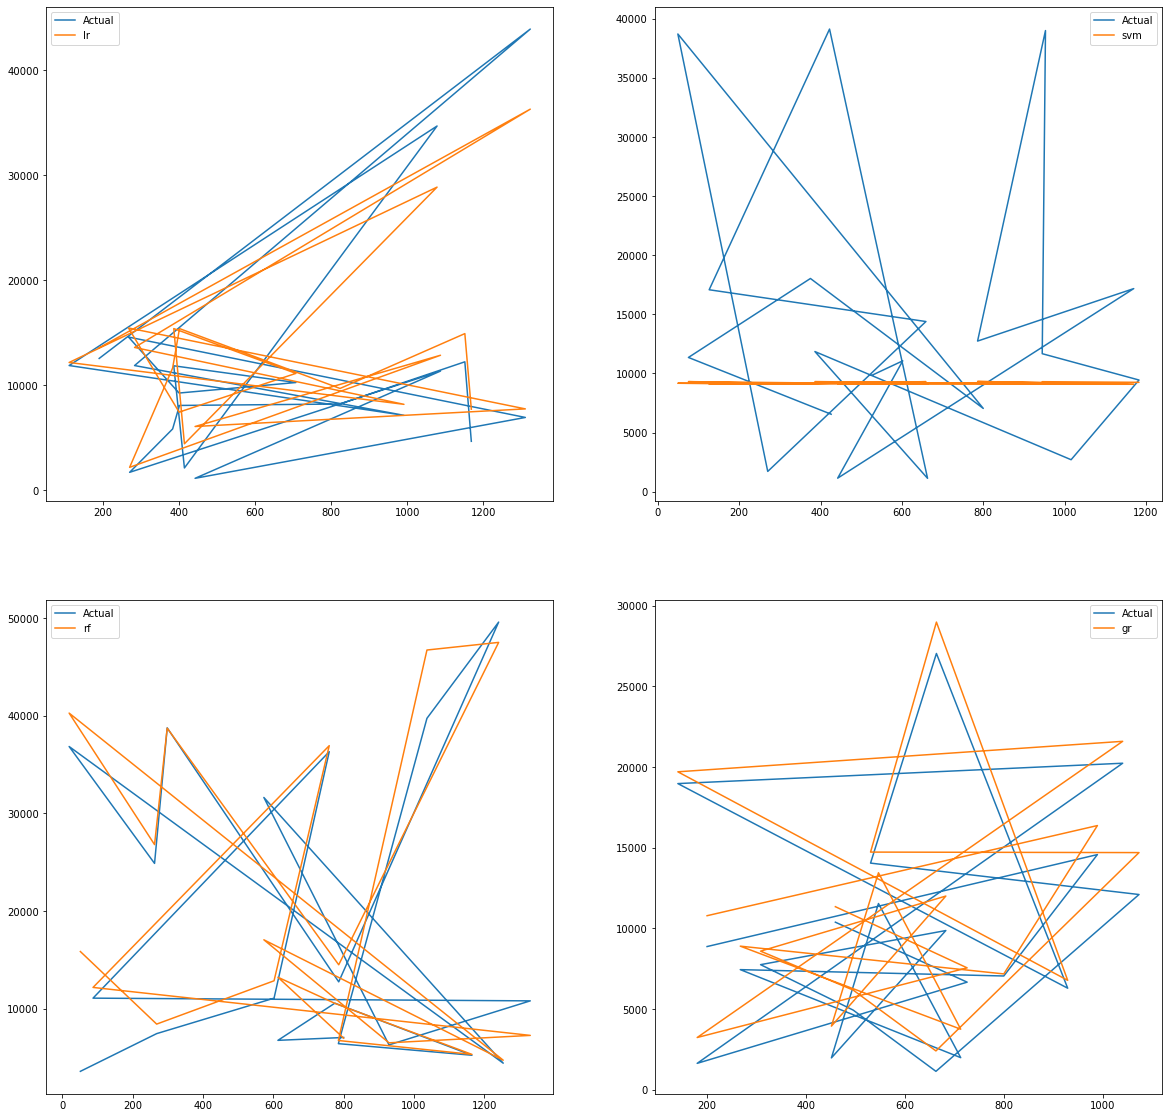

In [18]:
# تصوير يساعد على تحديد تقييم التوقع
fig , ax = plt.subplots(2,2,figsize=(20,20))
ax[0][0].plot(df[['Actual','lr']].sample(20))
ax[0][0].legend(['Actual','lr'])
ax[0][1].plot(df[['Actual','svm']].sample(20))
ax[0][1].legend(['Actual','svm'])
ax[1][0].plot(df[['Actual','rf']].sample(20))
ax[1][0].legend(['Actual','rf'])
ax[1][1].plot(df[['Actual','gr']].sample(20))
ax[1][1].legend(['Actual','gr'])

In [19]:
score_rf = metrics.r2_score(y_test,y_predrf)
score_gr = metrics.r2_score(y_test,y_predgr)

In [20]:
score_rf,score_gr

(0.8543967365880691, 0.8756632624254739)

In [21]:
score_rf = metrics.mean_absolute_error(y_test,y_predrf)
score_gr = metrics.mean_absolute_error(y_test,y_predgr)

In [22]:
score_rf,score_gr

(2642.207900946007, 2316.296822686882)

In [23]:
dic = {'age':40,'sex':1,'bmi':40.30,'childern':4,'smoker':1,'region':2}
df = pd.DataFrame(dic,index=[0])

In [24]:
df

,age,sex,bmi,childern,smoker,region
0,40,1,40.3,4,1,2


In [25]:
new_pred = gr.predict(df)
new_pred

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- childern
Feature names seen at fit time, yet now missing:
- children

  warnings.warn(message, FutureWarning)


array([41211.37501275])

In [26]:
gr = GradientBoostingRegressor()
gr.fit(X,y)


GradientBoostingRegressor()

In [27]:
joblib.dump(gr,'model_joblib_gr')

['model_joblib_gr']

In [28]:
model = joblib.load('model_joblib_gr')

In [29]:
model.predict(df)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- childern
Feature names seen at fit time, yet now missing:
- children

  warnings.warn(message, FutureWarning)


array([42148.361888])

In [30]:
def show_entry():
    p1 = float(e1.get())
    p2 = float(e2.get())
    p3 = float(e3.get())
    p4 = float(e4.get())
    p5 = float(e5.get())
    p6 = float(e6.get())
    
    model = joblib.load('model_joblib_gr')
    result = model.predict([[p1,p2,p3,p4,p5,p6]])
    
    Label(master, text = 'insurance Cost').grid(row=7)
    Label(master,text=result).grid(row=8)


master = Tk()
master.title('Insurance Cost Prediction')
label = Label(master,text = 'Insurance Cost Prediction',bg = 'black',fg='white').grid(row=0,columnspan= 2)
Label(master,text='Enter your Age').grid(row =1 )
Label(master,text='Male Or Female [1/0]').grid(row =2 )
Label(master,text='Enter your BMI Value').grid(row =3)
Label(master,text='Enter number of Children').grid(row =4 )
Label(master,text='Smoker Yes/NO [1/0]').grid(row =5 )
Label(master,text='Region [1-4]').grid(row =6 )

e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)

e1.grid(row=1,column=1)
e2.grid(row=2,column=1)
e3.grid(row=3,column=1)
e4.grid(row=4,column=1)
e5.grid(row=5,column=1)
e6.grid(row=6,column=1)

Button(master,text='Predict',command=show_entry).grid()

mainloop()